## Class Work
__Trial-and-Error Roots via Bisection__

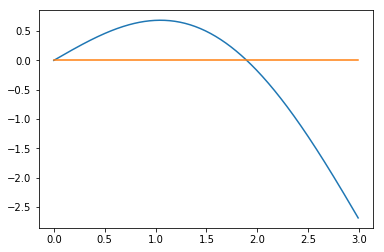

In [3]:
## Always a good idea to draw the function first
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2.*np.sin(x)-x

t = np.arange(0.0, 3.0, 0.01)
s = f(t)
plt.plot(t, s)
s2 = np.zeros(len(t))
plt.plot(t,s2)
plt.show()

In [4]:
def bisection(xmin,xmax, Nmax, eps,f):
    for i in range(0,Nmax):
        x=(xmin+xmax)/2.
        if(f(xmin)*f(x)>0):
            # add one line here
            xmin = x
        else:
            # add another line here
            xmax = x
        if(abs(f(x))<eps):
            print("Root is at",x," after ",i," iterations, with a precision of ",abs(f(x)))
            break
    return x

In [5]:
eps = 1.e-8
a=0.5
b=3.
nmax=100
root = bisection(a,b,nmax,eps,f)

Root is at 1.8954942673444748  after  24  iterations, with a precision of  5.08602937543e-10


__Newton-Raphson Searching__

In [6]:
def newtonraphson(x0,dx, Nmax, eps,f):
    for i in range(0,Nmax):
        df = (f(x0+dx/2)-f(x0-dx/2))/dx
        # add one line here to update x0
        x0=x0-f(x0)/df
        if(abs(f(x0))<eps):
            print("Root is at",x0," after ",i," iterations, with a precision of ",abs(f(x0)))
            break
    return x0

In [7]:
eps = 1.e-8
dx=1.e-6
a=3.
nmax=100
root = newtonraphson(a,dx,nmax,eps,f)

Root is at 1.89549426703  after  4  iterations, with a precision of  4.4408920985e-16


In [8]:
# However, if the initial guess is on the other side of the slope, it will get a different result
eps = 1.e-8
dx=1.e-6
a=0.
nmax=100
root = newtonraphson(a,dx,nmax,eps,f)

Root is at 0.0  after  0  iterations, with a precision of  0.0


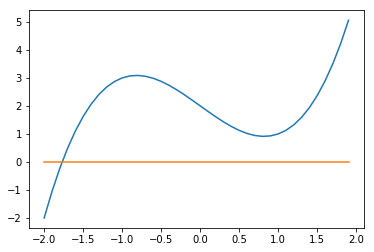

In [9]:
# it can even fail, entering infinity loop, for example x^3-2x+2
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x*x*x-2*x+2

t = np.arange(-2., 2.0, 0.1)
s = f(t)
plt.plot(t, s)
s2 = np.zeros(len(t))
plt.plot(t,s2)
plt.show()

In [10]:
def newtonraphson2(x0,dx, Nmax, eps,f):
    for i in range(0,Nmax):
        df = (f(x0+dx/2)-f(x0-dx/2))/dx
        x0 = x0-f(x0)/df
        print(x0)
    return x

eps = 1.e-8
dx=1.e-6
a=0.
nmax=100
root = newtonraphson2(a,dx,nmax,eps,f)

0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.99999999997124

NameError: name 'x' is not defined

__Newton-Raphson with Backtracking__

In [11]:
def newtonraphsonbacktracking(x0,dx,Nmax, eps,f):
    for i in range(0,Nmax):        
        df = (f(x0+dx/2)-f(x0-dx/2))/dx
        dxt = -f(x0)/df
        while (abs(f(x0+dxt))>abs(f(x0))): # please finish the statement in while
              dxt=dxt/2.
        x0 = x0+dxt
        print(x0,dxt,f(x0),df)
        if(abs(f(x0))<eps):
              print("Root is at",x0," after ",i," iterations, with a precision of ",abs(f(x0)))
              break
    return x0

In [12]:
# it can even fail, entering infinity loop
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x*x*x-2*x+2

eps = 1.e-8
dx=1.e-6
a=0.
nmax=100
root = newtonraphsonbacktracking(a,dx,nmax,eps,f)

0.9999999999712443 0.9999999999712443 0.9999999999712443 -2.0000000000575113
0.7500000000133777 -0.2499999999578666 0.9218749999958193 1.000000000139778
0.8421875000492013 0.09218750003582352 0.9129715690675693 -0.31249999987714716
0.8142908075929085 -0.027896692456292796 0.9113497991999036 0.1278393557679891
0.8168680524869241 0.002577244894015586 0.9113382301554562 -0.010791441962254567
0.8163905784511616 -0.000477474035762443 0.9113379196189271 0.0018202452878313125
0.8165997950586598 0.0002092166074981222 0.9113379181922632 -0.0005192701824086043
0.8164923744917667 -0.00010742056689300943 0.9113378921397066 0.0005056757235166742
0.8164975228482569 5.148356490287829e-06 0.9113378920985387 -2.060729364927738e-05
0.8164960858970468 -1.4369512100993608e-06 0.9113378920969657 4.614530979552001e-06
0.8164967694421862 6.835451393571088e-07 0.9113378920964523 -2.425171174991192e-06
0.8164965451128589 -2.2432932728528058e-07 0.9113378920963684 9.237055564881302e-07
0.8164965820278114 3.6914

__Newton-Raphson for equations__

$x_1^2+x_1x_2=10$ <br>
$x_2+3x_1x_2^2=57$

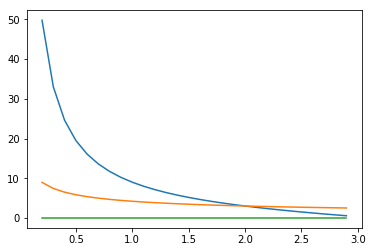

In [16]:
## Always a good idea to draw the function first
import matplotlib.pyplot as plt
import numpy as np

def f1(x):
    return (10.-x*x)/x

def f2(x):
    return (-1+np.sqrt(1.+4.*3.*x*57))/6./x

## Draw graphics to roughly determine x1 and x2
t = np.arange(0.2, 3.0, 0.1)
s = f1(t)
plt.plot(t, s)
s = f2(t)
plt.plot(t, s)
s = np.zeros(len(t))
plt.plot(t,s)
plt.show()

In [20]:
# return several values using array
import matplotlib.pyplot as plt
import numpy as np


def F(x,f):
    f[0]=x[0]*x[0]+x[0]*x[1]-10.
    f[1]=x[1]+3.*x[0]*x[1]*x[1]-57.

x=[1.,2.]
F(x,f)
print(f)

[-7.0, -43.0]


In [23]:
f=[0.]  #in f is an array or np.array, the main program can notice that 
        #it has been changed within a function (it is similar to pass by pointer (C) or reference (C++))
def F2(x,f):
    f[0]=x-10.

F2(4.,f)
print(f)

f=0.             #If f is a variable, the main program won't notice that it is changed within the program
def F3(x,f):
    f=x-10.

F3(4.,f)
print(f)

[-6.0]
0.0


# Homework: using Newton-Raphson method to solve above equation arrays
### Hint: first you need to derive the partical derivative of the equation arrays. You can do it either analytically by hand or numerically using method we learned in the last lecture.
$x_1^2+x_1x_2=10$ <br>
$x_2+3x_1x_2^2=57$

In [24]:
from numpy import *
from numpy.linalg import solve

n = 2
eps = 1e-3
deriv = zeros( (n, n), float)
f = zeros( (n), float)
x = array([0.5, 0.5])

def F(x, f): 
    f[0]=x[0]*x[0]+x[0]*x[1]-10.
    f[1]=x[1]+3.*x[0]*x[1]*x[1]-57.
    
def dFi_dXj(x, deriv, n):                           # Derivatives
    h = 1e-4                                             
    for j in range(0, n):
         temp = x[j]
         x[j] = x[j] +  h/2.
         F(x, f)                                                 
         for i in range(0, n):  deriv[i, j] = f[i] 
         x[j] = temp
    for j in range(0, n):
         temp = x[j]
         x[j] = x[j] - h/2.
         F(x, f)
         for i in range(0, n): deriv[i, j] = (deriv[i, j] - f[i])/h
         x[j] = temp

for it in range(1, 100):                            
      F(x, f)                              
      dFi_dXj(x, deriv, n)   
      B = array([[-f[0]], [-f[1]]])      
      sol = solve(deriv, B)
      dx = sol#take(sol, (0, ), 1)               # First column of sol
      for i in range(0, n):
        x[i]  = x[i]  +  dx[i]
      errX = errF = errXi = 0.0
      endi=0
      for i in range(0, n):
        if ( x[i] !=  0.): errXi = abs(dx[i]/x[i])
        else:  errXi = abs(dx[i])
        if ( errXi > errX): errX = errXi                            
        if ( abs(f[i]) > errF ):  errF = abs(f[i])        
        if ( (errX <=  eps) and (errF <=  eps) ): endi=1
      if(endi==1): break  
      
print('Number of iterations = ', it, "\n Final Solution:")
for i in range(0, n):
        print('x[', i, '] =  ', x[i]) 

Number of iterations =  15 
 Final Solution:
x[ 0 ] =   2.0
x[ 1 ] =   3.00005


# Class Work

In [25]:
import numpy as np
a=np.array([[9.,13.,5.,2.],[1.,11.,7.,6.],[3.,7.,4.,1.],[6.,1.,7.,10.]])
b=np.array([7.,8.,9.,10.])
c=np.zeros(4)

for i in range(4):
    for j in range(4):
        # please finish this line
        c[i]=c[i]+a[i,j]*b[j]
        
print(c)

[ 232.  218.  123.  213.]


In [26]:
import numpy as np
#============================================================================
def LUFactor(a, ipivot, n):
# Copy right, code from Titus textbook. 
#----------------------------------------------------------------------------
#  Performs LU factorization of (n x n) matrix a (diag(L) = 1). On exit,
#  replaces upper triangle and diagonal with U, and lower triangle, with L.
#  Uses partial pivoting on columns.
#  a      - coefficient matrix (n x n); LU decomposition on exit
#  ipivot - array of pivot row indexes (output)
#  det    - determinant of coefficient matrix (output).
#----------------------------------------------------------------------------
   det = 1e0
   for j in range(n):                                 # loop over columns
      for i in range(j):                             # elements of matrix U
         sum = a[i][j]
         for k in range(i): sum -= a[i][k]*a[k][j]
         a[i][j] = sum

      amax = 0e0
      for i in range(j,n):                           # elements of matrix L
         sum = a[i][j]                                 # undivided by pivot
         for k in range(j): sum -= a[i][k]*a[k][j]
         a[i][j] = sum
                                                            # determine pivot
         if (amax < np.fabs(a[i][j])): amax = np.fabs(a[i][j]); imax = i

      if (amax == 0e0): print("LUFactor: singular matrix !"); return 0e0

      ipivot[j] = imax                                # store pivot row index
                                                # interchange rows imax and j
      if (imax != j):                           # to put pivot on diagonal
         det = -det
         for k in range(n):
            t = a[imax][k]; a[imax][k] = a[j][k]; a[j][k] = t

      det *= a[j][j]                        # multiply determinant with pivot

      t = 1e0/a[j][j]                         # divide elements of L by pivot
      for i in range(j+1,n): a[i][j] *= t

   return det

#============================================================================
def LUSystem(a, ipivot, b, n):
# Copy right, code from Titus textbook. 
#----------------------------------------------------------------------------
#  Solves linear system a x = b of order n by LU factorization.
#  a      - LU decomposition of coefficient matrix (returned by LUFactor)
#  ipivot - array of pivot row indexes (input)
#  b      - vector of constant terms (input); solution x (on exit)
#----------------------------------------------------------------------------
   for i in range(n):                                     # solves Ly = b
      sum = b[int(ipivot[i])]
      b[int(ipivot[i])] = b[i]
      for j in range(i): sum -= a[i][j]*b[j]
      b[i] = sum

   for i in range(n-1,-1,-1):                                    # solves Ux = y
      sum = b[i]
      for j in range(i+1,n): sum -= a[i][j]*b[j]
      b[i] = sum/a[i][i]

In [27]:
import numpy as np
a=np.array([[9.,13.,5.,2.],[1.,11.,7.,6.],[3.,7.,4.,1.],[6.,1.,7.,10.]])
b=np.array([7.,8.,9.,10.])
aa=np.copy(a)    #deep copy of an array
bb=np.copy(b)    #deep copy of an array
ipivot=np.zeros(4)
de=LUFactor(a,ipivot,4)
LUSystem(a,ipivot,b,4)
print(b)

print(np.dot(aa,b)-bb)

[ 0.1729798  -0.87689394  4.13194444 -1.9084596 ]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00  -7.10542736e-15]


In [28]:
#============================================================================
def GaussSeidel(a, b, x, n, init):
# Copy right, code from Titus textbook. 
#----------------------------------------------------------------------------
#  Solves linear system a x = b by the Gauss-Seidel method.
#  Convergence is ensure by left-multiplying the system with a^T.
#  a    - coefficient matrix (n x n)
#  b    - vector of constant terms
#  x    - initial approximation of solution (input); solution (output)
#  n    - order of system
#  err  - maximum relative error of the solution components
#  init - initialization option: 0 - refines initial approximation 
#                                1 - initializes solution
#----------------------------------------------------------------------------
   eps = 1e-15                                 # relative precision criterion
   itmax = 10000                                    # max no. of iterations

   s = [[0]*(n) for i in range(n)]           # matrices of reduced system
   t = [0]*(n)

   for i in range(n):                         # matrices of normal system
      for j in range(i+1):                      # by multiplication with aT
         s[i][j] = 0e0                            # store result in s and t
         for k in range(n): s[i][j] += a[k][i]*a[k][j]
         s[j][i] = s[i][j]

      t[i] = 0e0
      for j in range(n): t[i] += a[j][i]*b[j]

   for i in range(n):                # matrices s and t of reduced system
      f = -1e0/s[i][i]; t[i] /= s[i][i]
      for j in range(n): s[i][j] *= f

   if (init):
      for i in range(n): x[i] = t[i]                # initialize solution

   for k in range(itmax):                            # loop of iterations
      err = 0e0
      for i in range(n):
         delta = t[i]                                            # correction
         for j in range(n): delta += s[i][j]*x[j]
         x[i] += delta                        # new approximation to solution
         if (x[i]): delta /= x[i]                            # relative error
         if (np.fabs(delta) > err): err = np.fabs(delta)            # maximum error
       #  print('delta,err',delta,err)
            
      if (err <= eps): break                              # check convergence

   if (k > itmax-2): print("GaussSeidel: max. no. of iterations exceeded !")
    
   return err

In [29]:
import numpy as np
a=np.array([[9.,13.,5.,2.],[1.,11.,7.,6.],[3.,7.,4.,1.],[6.,1.,7.,10.]])
b=np.array([7.,8.,9.,10.])
x=np.array([1.,1.,1.,1.])

GaussSeidel(a, b, x, 4, 1)
print('x=',x)
print(np.dot(a,x)-b)

x= [ 0.1729798  -0.87689394  4.13194444 -1.9084596 ]
[  9.23705556e-14   6.75015599e-14  -2.27373675e-13  -3.19744231e-14]


In [30]:
import numpy as np
import time
N=100
A=np.zeros((N,N),float)
B=np.zeros(N,float)
for i in range(N):
    for j in range(N):
        A[i,j]=1./(i+j+1.)
        
for i in range(N):
    B[i]=1./(i+1)

start = time.time()
# write one line of code to solve Ax=B using linalg package 
x=np.linalg.solve(A,B)
end = time.time()
print('x=',x)
print('Time ',end-start)

x=np.ones(N)
start2 = time.time()
# write one line of code to solve Ax=B using Gauss-Siedel method 
GaussSeidel(A, B, x, 4, 1)

end2 = time.time()
print('x=',x)
print('Time ',end2-start2)

ipivot=np.zeros(N)
start3 = time.time()
# write two lines of code to solve Ax=B with LU decomposition
de=LUFactor(A,ipivot,4)
LUSystem(A,ipivot,B,4)

end3 = time.time()
print('x=',B)
print('Time ',end3-start3)

x= [ 1.  0.  0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0.
  0.  0.  0. -0.  0.  0.  0. -0. -0. -0.  0.  0. -0.  0. -0.  0.  0.  0.
 -0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0. -0.  0.  0.  0.  0.
 -0.  0. -0.  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.
  0.  0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0.  0.  0.  0.
 -0.  0.  0. -0. -0.  0. -0. -0. -0. -0.]
Time  0.0009958744049072266
GaussSeidel: max. no. of iterations exceeded !
x= [ 1.0297499  -0.04694805 -0.26420505  0.32845104  1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          

In [37]:
# Find the eigenvalue and eigenvector for ([1,-3,3],[3,-5,3],[6,-6,4])

# Now double check that the derived eigenvalue and eigenvector can satisfy Ax=\lamba x

# Find the eigenvalue and eigenvector for ([1,-3,3],[3,-5,3],[6,-6,4])

# Now double check that the derived eigenvalue and eigenvector can satisfy Ax=\lamba x

import numpy as np
I=np.array([[1.,-3.,3.],[3.,-5.,3.],[6.,-6.,4.]])
print(I)
eigenvalues, eigenmatrix = np.linalg.eig(I)
print('Eigenvalues', eigenvalues, '\n Eigenmatrix', eigenmatrix)
print('Eigenvector',eigenmatrix[:,0],eigenmatrix[:,1], eigenmatrix[:,1])

eigenvector1=np.array([eigenmatrix[0,0],eigenmatrix[1,0],eigenmatrix[2,0]])
LHS = np.dot(I,eigenvector1)
RHS = eigenvector1*eigenvalues[0]
print('LHS-RHS',LHS-RHS)

[[ 1. -3.  3.]
 [ 3. -5.  3.]
 [ 6. -6.  4.]]
Eigenvalues [ 4. +0.00000000e+00j -2. +1.10465796e-15j -2. -1.10465796e-15j] 
 Eigenmatrix [[-0.40824829+0.j          0.24400118-0.40702229j  0.24400118+0.40702229j]
 [-0.40824829+0.j         -0.41621909-0.40702229j -0.41621909+0.40702229j]
 [-0.81649658+0.j         -0.66022027+0.j         -0.66022027-0.j        ]]
Eigenvector [-0.40824829+0.j -0.40824829+0.j -0.81649658+0.j] [ 0.24400118-0.40702229j -0.41621909-0.40702229j -0.66022027+0.j        ] [ 0.24400118-0.40702229j -0.41621909-0.40702229j -0.66022027+0.j        ]
LHS-RHS [  4.44089210e-16+0.j   2.22044605e-16+0.j   8.88178420e-16+0.j]


# Homework

In [36]:
#Homework: Use the linalg package, LU decompositin, and GaussSeidel method to solve 2y+z=-8, x-2y-3z=0, -x+y+2z=3

import numpy as np
import time
N=100
A=np.array([[0.,2.,1.],[1.,-2.,-3.],[-1.,1.,2.]])
B=np.array([-8,0,3])

start = time.time()
# write one line of code to solve Ax=B using linalg package 
x=np.linalg.solve(A,B)
end = time.time()
print('x=',x)
print('Time ',end-start)

x=np.ones(N)
start2 = time.time()
# write one line of code to solve Ax=B using Gauss-Siedel method 
GaussSeidel(A, B, x, 3, 1)

end2 = time.time()
print('x=',x)
print('Time ',end2-start2)

ipivot=np.zeros(N)
start3 = time.time()
# write two lines of code to solve Ax=B with LU decomposition
de=LUFactor(A,ipivot,3)
LUSystem(A,ipivot,B,3)

end3 = time.time()
print('x=',B)
print('Time ',end3-start3)

x= [-4. -5.  2.]
Time  0.00018286705017089844
x= [-4. -5.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Time  0.06939053535461426
x= [-4 -5  2]
Time  0.0002391338348388672


In [38]:
# Homework for graduate students:
# Solve equation array dx/dt=x-(1/8)y, dy/dt=-2x+y.  Write down the analytical solution 
# (coefficients can be floating point numbers)
# Hint: first use linalg to get the eigenvalue and eigenvector for [[1,-1/3],[-2,1]] array

import numpy as np
I=np.array([[1.,-1./8.],[-2.,1]])
print(I)
eigenvalues, eigenmatrix = np.linalg.eig(I)
print("eigenvalues = ", eigenvalues)
print("eigenvectors = ", eigenmatrix[:,0], eigenmatrix[:,1])

[[ 1.    -0.125]
 [-2.     1.   ]]
eigenvalues =  [ 1.5  0.5]
eigenvectors =  [ 0.24253563 -0.9701425 ] [ 0.24253563  0.9701425 ]


### Solution:
General solution is $c_1e^{\lambda_1}v_1 + c_2e^{\lambda_2}v_2$, where $\lambda_1$ and $\lambda_2$ are the two eigenvalues with their corresponsing eigenvectors $v_1$ and $v_2$, and $c_1$ and $c_2$ are constants that can be obtained by solving initial values etc.